#### Data Structures: Doc, Span and Token

Now that you know all about the vocabulary and string store, we can take a look at the most important data structure: the Doc, and its views Token and Span.

The Doc is one of the central data structures in spaCy. It's created automatically when you process a text with the nlp object. But you can also instantiate the class manually.

After creating the nlp object, we can import the Doc class from spacy.tokens.

Here we're creating a doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!

The Doc class takes three arguments: the shared vocab, the words and the spaces.

In [1]:
import spacy
from spacy.tokens import Doc

/home/max/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-24 21:20:05.376458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 21:20:05.479044: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-24 21:20:05.882792: W tensorflow/compiler/xla/stream_executor/platform/default/dso_lo

In [2]:
nlp = spacy.blank("en")

In [3]:
words = ["Hello", "world", "!"]
spaces = [True, False, False]

In [4]:
doc = Doc(vocab=nlp.vocab, words=words, spaces=spaces)

#### The Span object

A Span is a slice of a doc consisting of one or more tokens. The Span takes at least three arguments: the doc it refers to, and the start and end index of the span. Remember that the end index is exclusive!

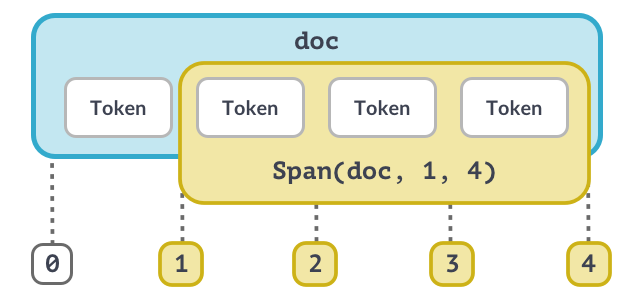

To create a Span manually, we can also import the class from spacy.tokens. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.

The doc.ents are writable, so we can add entities manually by overwriting it with a list of spans.

In [6]:
from spacy.tokens import Span

In [7]:
span = Span(doc, 0, 2)

In [8]:
span_with_label = Span(doc, 0, 2, label="GREETING")

In [9]:
doc.ents = [span_with_label]

In [12]:
doc.ents

(Hello world,)

A few tips and tricks before we get started:

The Doc and Span are very powerful and optimized for performance. They give you access to all references and relationships of the words and sentences.

If your application needs to output strings, make sure to convert the doc as late as possible. If you do it too early, you'll lose all relationships between the tokens.

To keep things consistent, try to use built-in token attributes wherever possible. For example, token.i for the token index.

Also, don't forget to always pass in the shared vocab!

#### Best practices
- Doc and Span are very powerful and hold references and relationships of words and sentences
    - Convert result to strings as late as possible
    - Use token attributes if available – for example, token.i for the token index
- Don't forget to pass in the shared vocab